## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Import the data set
df=pd.read_csv('/kaggle/input/tips-dataset/tips (data for regression problem).csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
df.dropna(inplace=True)

In [7]:
df = pd.get_dummies(df, drop_first=True) #Do one-hot encoding to change the the data types of object

In [8]:
df

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,True,False,True,False,False,False
240,27.18,2.00,2,False,True,True,False,False,False
241,22.67,2.00,2,True,True,True,False,False,False
242,17.82,1.75,2,True,False,True,False,False,False


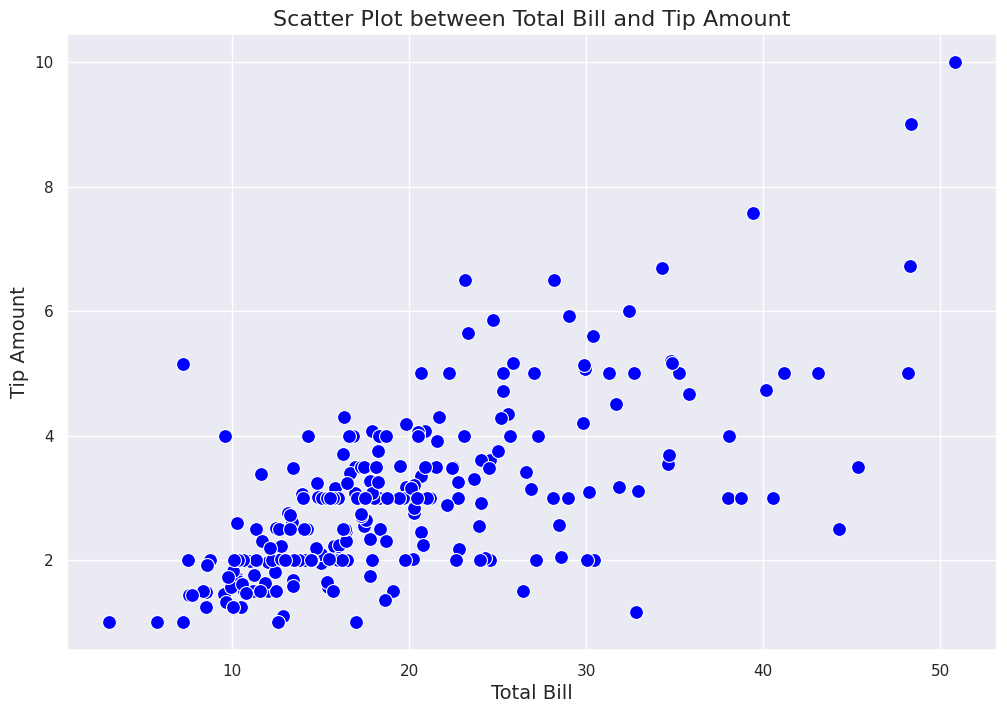

In [11]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x=df['total_bill'], y=df['tip'], s=100, color='blue')
plt.title("Scatter Plot between Total Bill and Tip Amount", fontsize=16)
plt.xlabel("Total Bill", fontsize=14)
plt.ylabel("Tip Amount", fontsize=14)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

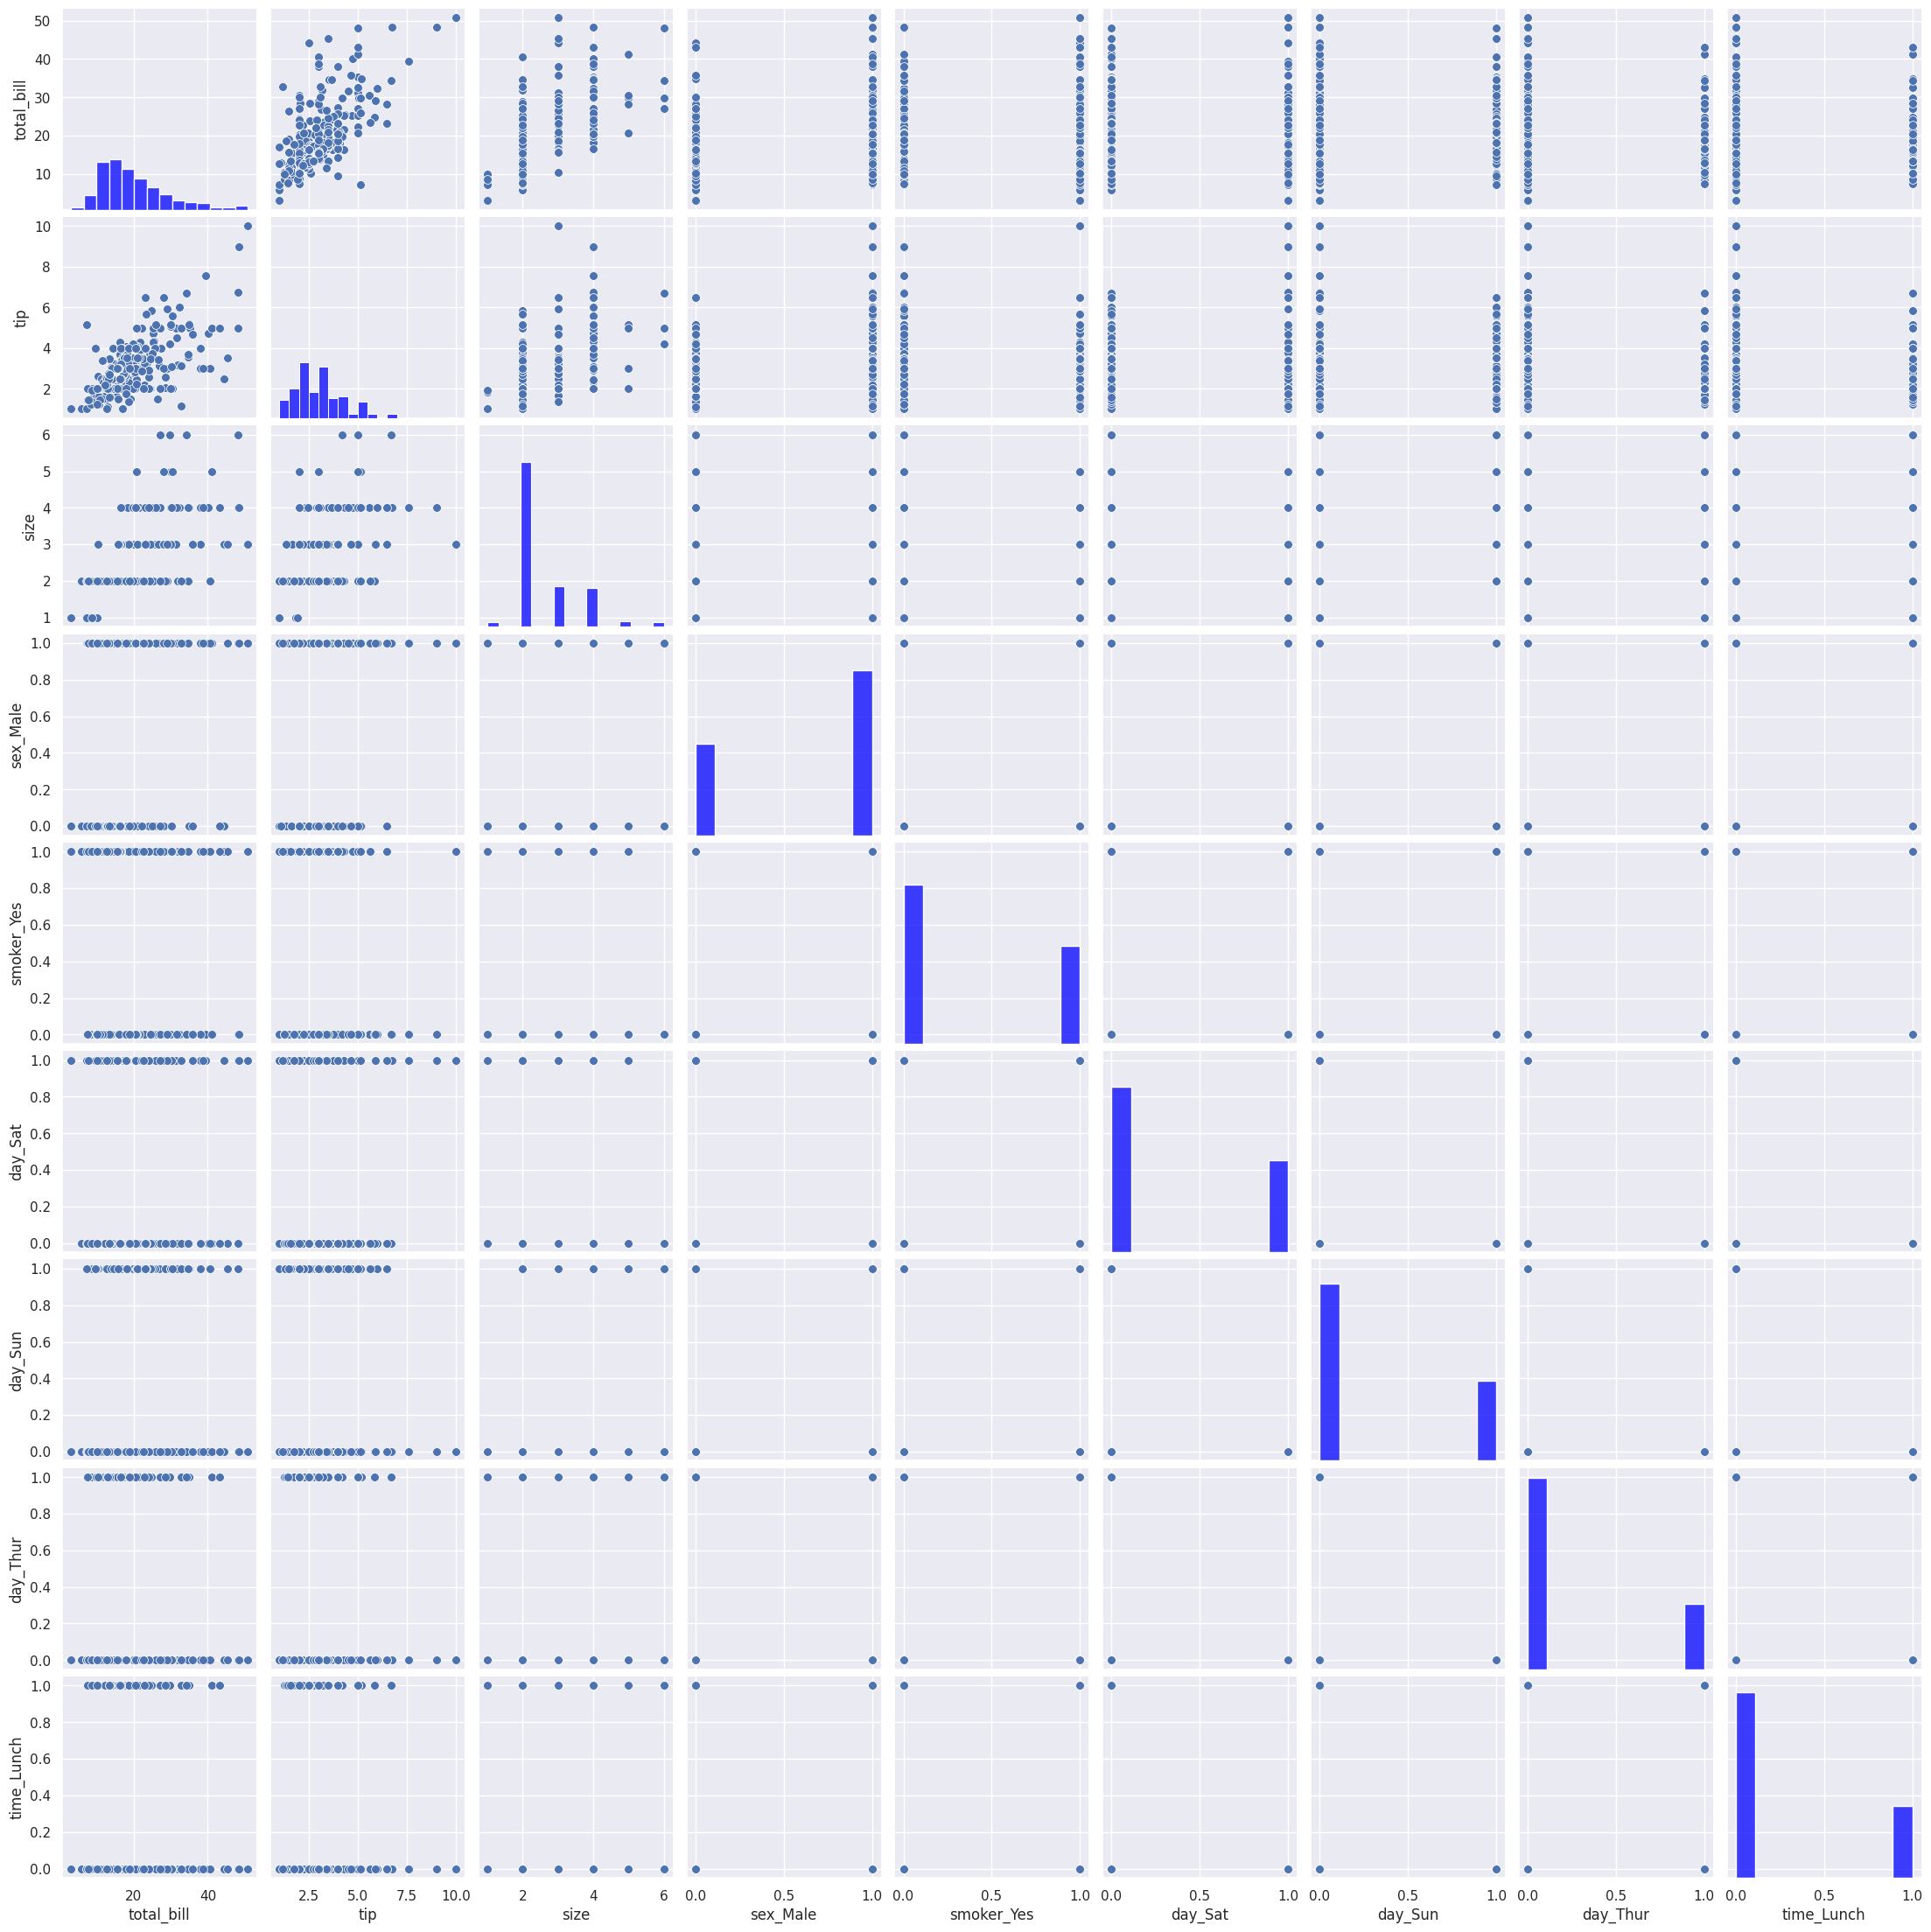

In [12]:
sns.set(style="darkgrid")

pair_plot = sns.pairplot(df, plot_kws={'s': 50, 'edgecolor': 'w'}, diag_kws={'color': 'blue'})

plt.show()


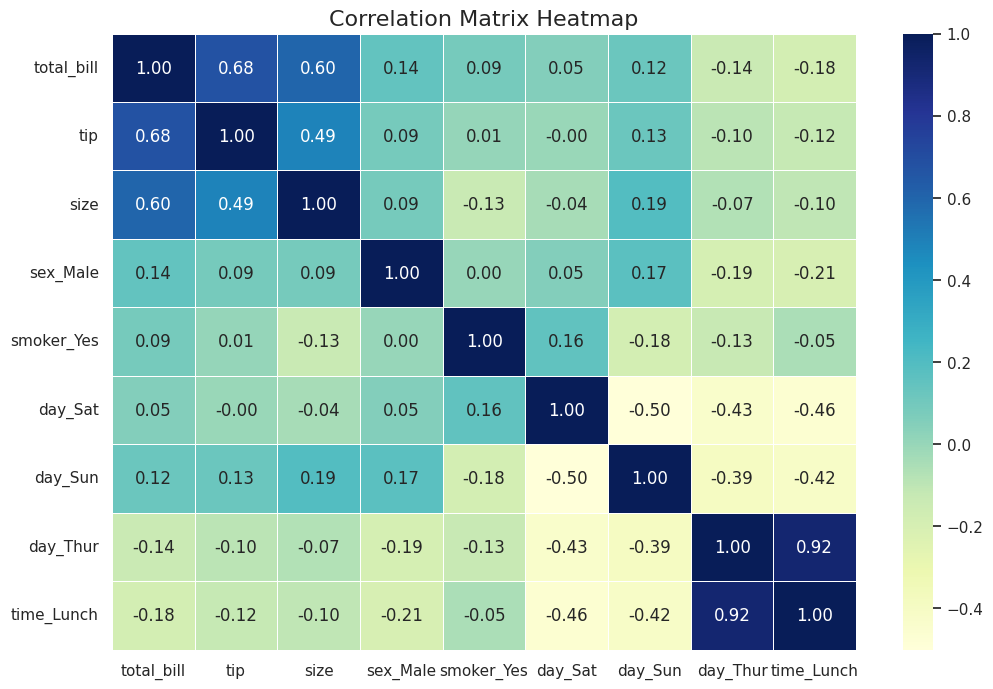

In [13]:
sns.set(style="white")

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5, linecolor='white')

plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()


In [14]:
import statsmodels.api as sm
# Convert boolean columns to integers
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})
X = sm.add_constant(df.drop('tip', axis=1))
y = df['tip']

model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_val = linear_rainbow(model)
print(f'Rainbow Test Statistic: {rainbow_stat}, p-value: {rainbow_p_val}')


Rainbow Test Statistic: 1.197054547994589, p-value: 0.1658838305924099


 Since the p-value is greater than 0.05, you would typically fail to reject the null hypothesis. This suggests that there is no strong evidence of heteroscedasticity, and the variance of the residuals is likely to be constant

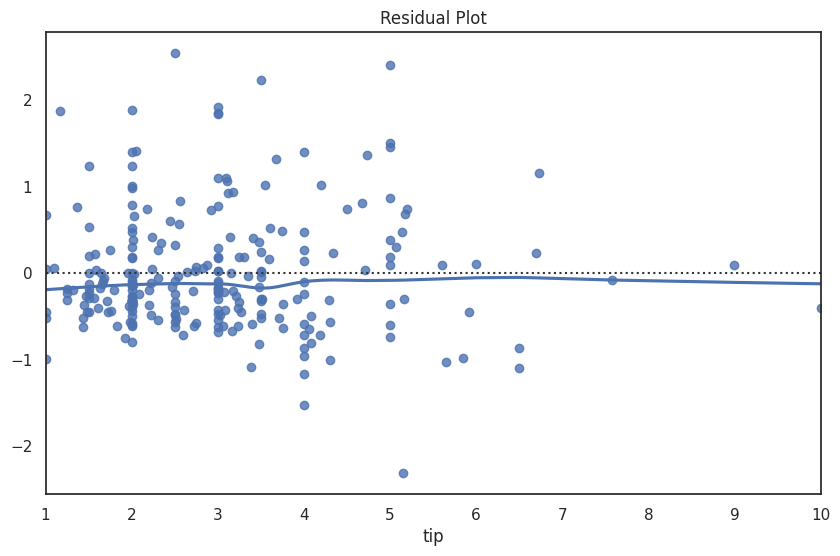

In [15]:
# Residual plot
sns.set(style="white")
plt.figure(figsize=(10, 6))
sns.residplot(x=y, y=LinearRegression().fit(X, y).predict(X), lowess=True)
plt.title("Residual Plot")
plt.show()

In [16]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, mse, r2

# Dictionary to store results
model_results = {}

In [18]:
lin_reg = LinearRegression()
model_results['Linear Regression'] = evaluate_model(lin_reg, X_train, y_train, X_test, y_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
model_results['Ridge Regression'] = evaluate_model(ridge, X_train, y_train, X_test, y_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
model_results['Lasso Regression'] = evaluate_model(lasso, X_train, y_train, X_test, y_test)

# Decision Tree Regression
tree = DecisionTreeRegressor(random_state=42)
model_results['Decision Tree'] = evaluate_model(tree, X_train, y_train, X_test, y_test)

# Random Forest Regression
forest = RandomForestRegressor(n_estimators=100, random_state=42)
model_results['Random Forest'] = evaluate_model(forest, X_train, y_train, X_test, y_test)

# Support Vector Regression
svr = SVR(kernel='rbf')
model_results['Support Vector Regression'] = evaluate_model(svr, X_train, y_train, X_test, y_test)

# K-Nearest Neighbors Regression
knn = KNeighborsRegressor(n_neighbors=5)
model_results['KNN Regression'] = evaluate_model(knn, X_train, y_train, X_test, y_test)

In [19]:
results_df = pd.DataFrame(model_results, index=['MAE', 'MSE', 'R2']).T
print("Model Evaluation Results:")
print(results_df)

Model Evaluation Results:
                                MAE       MSE        R2
Linear Regression          0.667133  0.703357  0.437302
Ridge Regression           0.666538  0.700748  0.439389
Lasso Regression           0.637484  0.590853  0.527307
Decision Tree              0.837143  1.217673  0.025839
Random Forest              0.758592  0.917984  0.265596
Support Vector Regression  0.568426  0.532469  0.574015
KNN Regression             0.718857  0.876373  0.298886


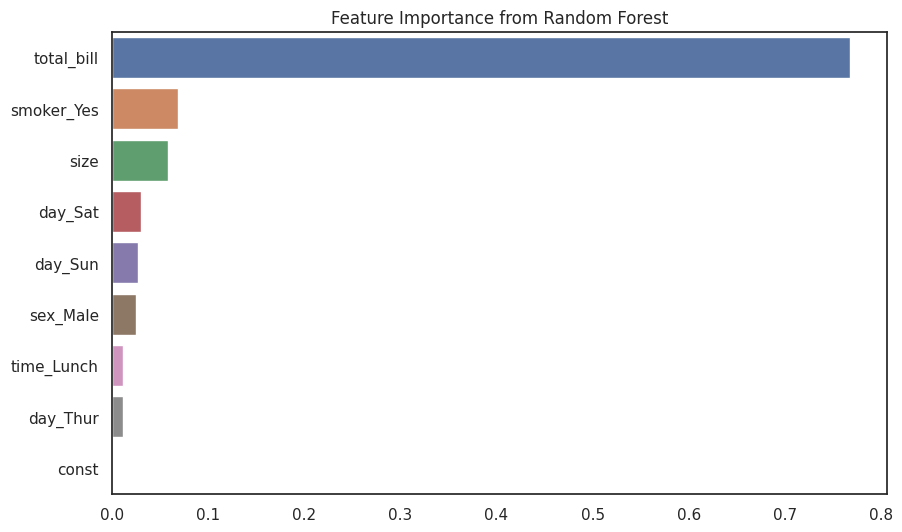

In [20]:
feature_importances = pd.Series(forest.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance from Random Forest")
plt.show()

In [21]:
for feature, importance in feature_importances.items():
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: total_bill, Importance: 0.7681
Feature: smoker_Yes, Importance: 0.0686
Feature: size, Importance: 0.0586
Feature: day_Sat, Importance: 0.0296
Feature: day_Sun, Importance: 0.0266
Feature: sex_Male, Importance: 0.0249
Feature: time_Lunch, Importance: 0.0118
Feature: day_Thur, Importance: 0.0118
Feature: const, Importance: 0.0000
